In [1]:
import nltk

In [2]:
import re

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
from nltk.probability import FreqDist

In [5]:
import matplotlib.pyplot as plt

ID do corpus

In [29]:
nltk_id = 'gutenberg'


In [30]:
nltk.download(nltk_id)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [31]:
print(nltk.corpus.gutenberg.readme())

Project Gutenberg Selections
http://gutenberg.net/

This corpus contains etexts from from Project Gutenberg,
by the following authors:

* Jane Austen (3)
* William Blake (2)
* Thornton W. Burgess
* Sarah Cone Bryant
* Lewis Carroll
* G. K. Chesterton (3)
* Maria Edgeworth
* King James Bible
* Herman Melville
* John Milton
* William Shakespeare (3)
* Walt Whitman

The beginning of the body of each book could not be identified automatically,
so the semi-generic header of each file has been removed, and included below.
Some source files ended with a line "End of The Project Gutenberg Etext...",
and this has been deleted.

Information about Project Gutenberg (one page)

We produce about two million dollars for each hour we work.  The
fifty hours is one conservative estimate for how long it we take
to get any etext selected, entered, proofread, edited, copyright
searched and analyzed, the copyright letters written, etc.  This
projected audience is one hundred million readers.  If our value


In [32]:
gutenberg = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

In [33]:
print(gutenberg)

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.

  Mar. Holla Barnardo

   Bar. Say, what is Horatio there?
  Hor. A peece of

Vamos fazer o seguinte:
* Selecionar apenas letras (remover pontuação, números e outros caracteres)
* Converter o texto para letra minúscula

In [35]:
gutenberg_letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', gutenberg.lower())

In [36]:
print(gutenberg_letras_min)

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo', 'and', 'francisco', 'two', 'centinels', 'barnardo', 'who', 's', 'there', 'fran', 'nay', 'answer', 'me', 'stand', 'vnfold', 'your', 'selfe', 'bar', 'long', 'liue', 'the', 'king', 'fran', 'barnardo', 'bar', 'he', 'fran', 'you', 'come', 'most', 'carefully', 'vpon', 'your', 'houre', 'bar', 'tis', 'now', 'strook', 'twelue', 'get', 'thee', 'to', 'bed', 'francisco', 'fran', 'for', 'this', 'releefe', 'much', 'thankes', 'tis', 'bitter', 'cold', 'and', 'i', 'am', 'sicke', 'at', 'heart', 'barn', 'haue', 'you', 'had', 'quiet', 'guard', 'fran', 'not', 'a', 'mouse', 'stirring', 'barn', 'well', 'goodnight', 'if', 'you', 'do', 'meet', 'horatio', 'and', 'marcellus', 'the', 'riuals', 'of', 'my', 'watch', 'bid', 'them', 'make', 'hast', 'enter', 'horatio', 'and', 'marcellus', 'fran', 'i', 'thinke', 'i', 'heare', 'them', 'stand', 'who', 's', 'there', 'hor', 'friends', 'to', 'this',

Agora vamos remover as stopwords, ou seja, as palavras que não possuem valor semântico para a busca (exemplo: artigos e preposições. O NLTK fornece bibliotecas de stopwords para vários idiomas.

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
stopwords = nltk.corpus.stopwords.words('english')

In [39]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
list_stopwords_portugues = set(stopwords)
print(list_stopwords_portugues)

{'there', 's', 'needn', 'what', 'off', 'through', 'my', 'does', 've', 'up', "wasn't", 'other', 'ain', 'why', 'him', "isn't", 'of', 'hers', 'some', 'few', 'again', 'doesn', "you're", 'before', 'i', 'am', 'our', "don't", "doesn't", 'she', 'nor', 'that', 'over', 'between', 'during', 'mustn', 'now', 'because', 'wasn', 'was', 'these', "needn't", 'y', 'down', "you've", 'been', 'you', 'theirs', 'whom', 'own', 'won', 'your', 'while', 'for', 'isn', 'yourself', 'hasn', 'ma', "she's", 'where', 'their', 'no', "mightn't", 'just', 'shan', 'above', 'not', 'yours', 'didn', 'he', "that'll", 'ourselves', 'or', "you'll", 'are', 'yourselves', 'into', 'more', 'out', 'here', 're', 'about', "won't", "couldn't", 'if', 'shouldn', 'did', 'once', 'o', 'll', 'which', "weren't", 'himself', 'me', 'a', 'aren', 'them', 'be', 'below', 'at', 'they', "didn't", "shan't", "you'd", 'each', 'it', 'to', "it's", "wouldn't", 'd', "shouldn't", 'we', "hadn't", 'and', 'should', 'same', 'the', 'further', 'were', 'its', "haven't", 

In [41]:
gutenberg_letras_min_semstop = [w for w in gutenberg_letras_min if w not in list_stopwords_portugues]

In [42]:
print(gutenberg_letras_min_semstop)

['tragedie', 'hamlet', 'william', 'shakespeare', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo', 'francisco', 'two', 'centinels', 'barnardo', 'fran', 'nay', 'answer', 'stand', 'vnfold', 'selfe', 'bar', 'long', 'liue', 'king', 'fran', 'barnardo', 'bar', 'fran', 'come', 'carefully', 'vpon', 'houre', 'bar', 'tis', 'strook', 'twelue', 'get', 'thee', 'bed', 'francisco', 'fran', 'releefe', 'much', 'thankes', 'tis', 'bitter', 'cold', 'sicke', 'heart', 'barn', 'haue', 'quiet', 'guard', 'fran', 'mouse', 'stirring', 'barn', 'well', 'goodnight', 'meet', 'horatio', 'marcellus', 'riuals', 'watch', 'bid', 'make', 'hast', 'enter', 'horatio', 'marcellus', 'fran', 'thinke', 'heare', 'stand', 'hor', 'friends', 'ground', 'mar', 'leige', 'men', 'dane', 'fran', 'giue', 'good', 'night', 'mar', 'farwel', 'honest', 'soldier', 'hath', 'relieu', 'fra', 'barnardo', 'ha', 'place', 'giue', 'goodnight', 'exit', 'fran', 'mar', 'holla', 'barnardo', 'bar', 'say', 'horatio', 'hor', 'peece', 'bar', 'welcome',

Também podemos trabalhar com radicais (stemming). Existem duas formas aqui:

*   Stemming - "corta" as palavras usando a raiz como base
*   Lemmatization - reduz as palavras a forma verdadeira da raiz

Exemplo: andando

*   Stemming - anda
*   Lemmatization - andar

Lemmatization é uma função mais complexa, portanto, se o texto for muito grande pode demorar um pouco para executá-la.

O nltk possui duas funções para stemming: Porter (PorterStemmer) e Lancaster (LancasterStemmer). Ele também possui um lemmatizador (WordNetLemmatizer).


In [43]:
porter = nltk.PorterStemmer()

In [44]:
gutenberg_letras_min_semstop_stem = [porter.stem(t) for t in gutenberg_letras_min_semstop]

In [45]:
print(gutenberg_letras_min_semstop_stem)

['tragedi', 'hamlet', 'william', 'shakespear', 'actu', 'primu', 'scoena', 'prima', 'enter', 'barnardo', 'francisco', 'two', 'centinel', 'barnardo', 'fran', 'nay', 'answer', 'stand', 'vnfold', 'self', 'bar', 'long', 'liue', 'king', 'fran', 'barnardo', 'bar', 'fran', 'come', 'care', 'vpon', 'hour', 'bar', 'ti', 'strook', 'twelu', 'get', 'thee', 'bed', 'francisco', 'fran', 'releef', 'much', 'thank', 'ti', 'bitter', 'cold', 'sick', 'heart', 'barn', 'haue', 'quiet', 'guard', 'fran', 'mous', 'stir', 'barn', 'well', 'goodnight', 'meet', 'horatio', 'marcellu', 'riual', 'watch', 'bid', 'make', 'hast', 'enter', 'horatio', 'marcellu', 'fran', 'think', 'hear', 'stand', 'hor', 'friend', 'ground', 'mar', 'leig', 'men', 'dane', 'fran', 'giue', 'good', 'night', 'mar', 'farwel', 'honest', 'soldier', 'hath', 'relieu', 'fra', 'barnardo', 'ha', 'place', 'giue', 'goodnight', 'exit', 'fran', 'mar', 'holla', 'barnardo', 'bar', 'say', 'horatio', 'hor', 'peec', 'bar', 'welcom', 'horatio', 'welcom', 'good', 'ma

Vamos ver a frequência de ocorrência dos termos e tentar enxergar diferenças entre o texto processado com e sem stemming.

In [46]:
freq_sem_stem = FreqDist(gutenberg_letras_min_semstop)
freq_com_stem = FreqDist(gutenberg_letras_min_semstop_stem)

In [47]:
print("20 palavras mais frequentes sem stem:")
print(freq_sem_stem.most_common(200))

20 palavras mais frequentes sem stem:
[('ham', 337), ('lord', 211), ('haue', 178), ('king', 172), ('thou', 107), ('shall', 107), ('come', 104), ('let', 104), ('hamlet', 100), ('good', 98), ('hor', 95), ('thy', 90), ('enter', 85), ('oh', 81), ('like', 80), ('would', 73), ('well', 71), ('know', 71), ('tis', 69), ('selfe', 68), ('loue', 66), ('may', 65), ('vs', 64), ('th', 62), ('sir', 62), ('qu', 62), ('laer', 60), ('giue', 59), ('thee', 58), ('ile', 58), ('must', 58), ('hath', 57), ('ophe', 56), ('speake', 55), ('make', 54), ('vpon', 52), ('say', 52), ('doe', 51), ('heere', 50), ('father', 50), ('pol', 49), ('see', 48), ('go', 48), ('one', 46), ('man', 46), ('heauen', 44), ('time', 44), ('mine', 44), ('much', 43), ('thinke', 43), ('tell', 43), ('play', 43), ('rosin', 43), ('thus', 41), ('horatio', 40), ('mother', 40), ('queene', 39), ('night', 38), ('polon', 38), ('death', 37), ('yet', 37), ('vp', 36), ('laertes', 35), ('againe', 34), ('life', 33), ('soule', 33), ('take', 32), ('heare',

In [48]:
print("20 palavras mais frequentes com stem:")
print(freq_com_stem.most_common(200))

20 palavras mais frequentes com stem:
[('ham', 337), ('lord', 216), ('king', 180), ('haue', 178), ('come', 128), ('hamlet', 107), ('let', 107), ('thou', 107), ('shall', 107), ('good', 98), ('hor', 95), ('thi', 90), ('enter', 86), ('like', 85), ('oh', 81), ('know', 76), ('make', 75), ('would', 73), ('loue', 72), ('well', 71), ('father', 70), ('ti', 69), ('self', 68), ('giue', 66), ('may', 65), ('sir', 65), ('vs', 64), ('speak', 64), ('th', 62), ('qu', 62), ('laer', 60), ('say', 59), ('thee', 58), ('ile', 58), ('must', 58), ('hath', 57), ('oph', 56), ('think', 55), ('heauen', 54), ('one', 54), ('vpon', 52), ('see', 52), ('time', 51), ('man', 51), ('doe', 51), ('heer', 50), ('go', 50), ('pol', 49), ('queen', 47), ('mother', 46), ('play', 46), ('look', 45), ('mine', 45), ('much', 43), ('tell', 43), ('rosin', 43), ('night', 42), ('thu', 41), ('horatio', 40), ('take', 39), ('soul', 38), ('polon', 38), ('hear', 37), ('death', 37), ('yet', 37), ('thing', 36), ('vp', 36), ('laert', 35), ('again

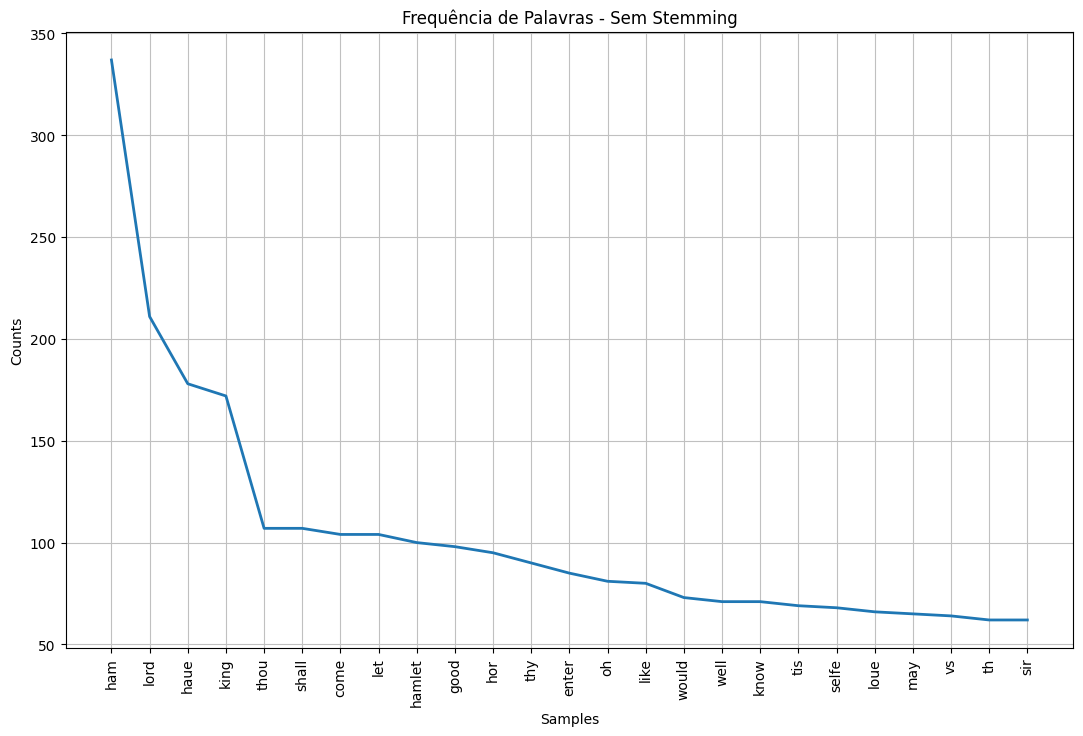

<Axes: title={'center': 'Frequência de Palavras - Sem Stemming'}, xlabel='Samples', ylabel='Counts'>

In [49]:
plt.figure(figsize = (13, 8))
freq_sem_stem.plot(25, title = "Frequência de Palavras - Sem Stemming")

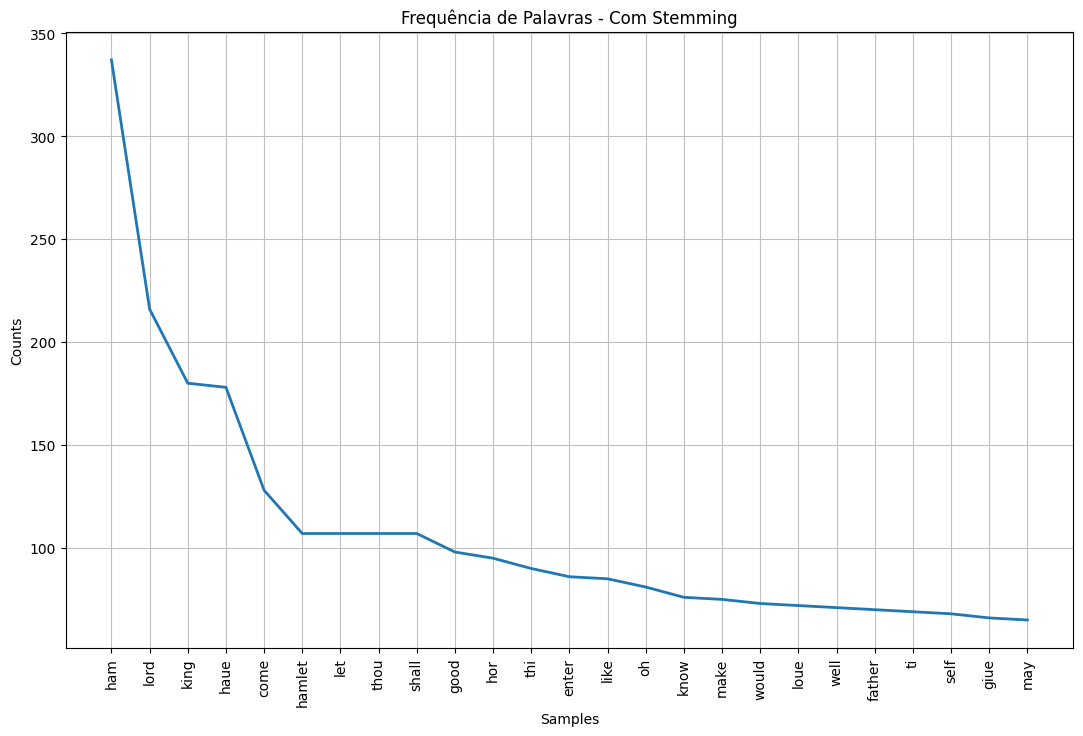

<Axes: title={'center': 'Frequência de Palavras - Com Stemming'}, xlabel='Samples', ylabel='Counts'>

In [50]:
plt.figure(figsize = (13, 8))
freq_com_stem.plot(25, title = "Frequência de Palavras - Com Stemming")